<a href="https://colab.research.google.com/github/Maedeabm/Stroke-Prediction-Odyssey-From-Classic-Classifiers-to-Transformers/blob/main/Stroke_prediction_Linear_Discriminant_Analysis_(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The process of building a Linear Discriminant Analysis (LDA) classifier on a stroke dataset from Kaggle


1. Data Loading:

we're using the pandas library to load the stroke dataset from a CSV file.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('stroke_dataset.csv')

2. Data Preprocessing:

Before building a model, it's essential to preprocess the data to handle missing values, encode categorical variables, etc.

Here, we're cleaning the data by handling missing values and encoding categorical variables. We then separate our features (X) and target (y) and split them into training and test sets.

In [ ]:
# Fill or drop missing values
data.dropna(inplace=True)

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = data.drop('stroke', axis=1)  # Assuming 'stroke' is the target column
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Model Training with LDA:

Linear Discriminant Analysis (LDA) is primarily used as a dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. However, it can also be used as a classification model.

In this step, we're using the LinearDiscriminantAnalysis class from scikit-learn to train our LDA classifier.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

4. Model Evaluation:

In the evaluation step:

We first predict the test set results using our trained LDA model.
We then print a comprehensive classification report which includes precision, recall, f1-score, and support for each class.
A visual representation of the confusion matrix using seaborn helps in understanding true positive, true negative, false positive, and false negative values.
Finally, we print the accuracy score of our model.

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.33      0.08      0.12        53

    accuracy                           0.94       982
   macro avg       0.64      0.53      0.55       982
weighted avg       0.92      0.94      0.92       982



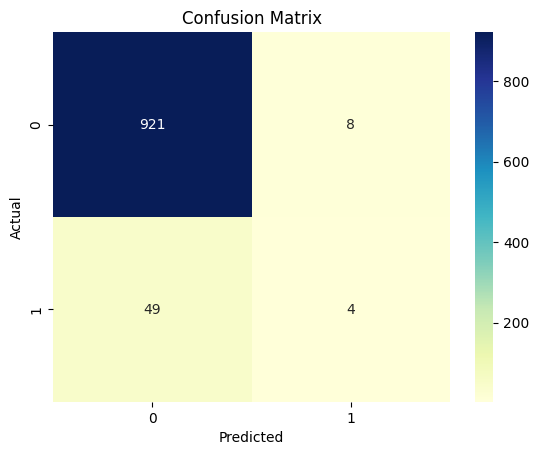

Accuracy: 0.9419551934826884


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = lda.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Explanation:

Linear Discriminant Analysis (LDA) is both a classifier and a dimensionality reduction technique. It works by maximizing the distance between the means of two classes while minimizing the spread (variance) within each class.

Classification Report provides the following metrics:
     
Precision: Ratio of correctly predicted positive observations to the total predicted positives.
     
Recall (Sensitivity): Ratio of correctly predicted positive observations to the all observations in actual class.
     
F1-Score: The weighted average of Precision and Recall.
     
Support: The number of actual occurrences of the class in the dataset.
     
Confusion Matrix is a table used to evaluate the performance of a classification model. It presents the true values vs. the predicted values from the model.
Accuracy is the ratio of correctly predicted observations to the total observations.

This gives you a complete walkthrough of creating and evaluating an LDA classifier for the stroke dataset. Depending on the nature and distribution of your dataset, you might need further preprocessing or feature engineering for optimal performance.

Some other complementary metrics:

In addition to the previously discussed metrics, we can consider other complementary metrics to evaluate our classification model's performance comprehensively. Here's how you can add and visualize them:

1. ROC Curve and AUC:

The ROC curve (Receiver Operating Characteristic curve) illustrates the true positive rate against the false positive rate. AUC (Area Under the Curve) quantifies the overall ability of the model to discriminate between positive and negative classes.

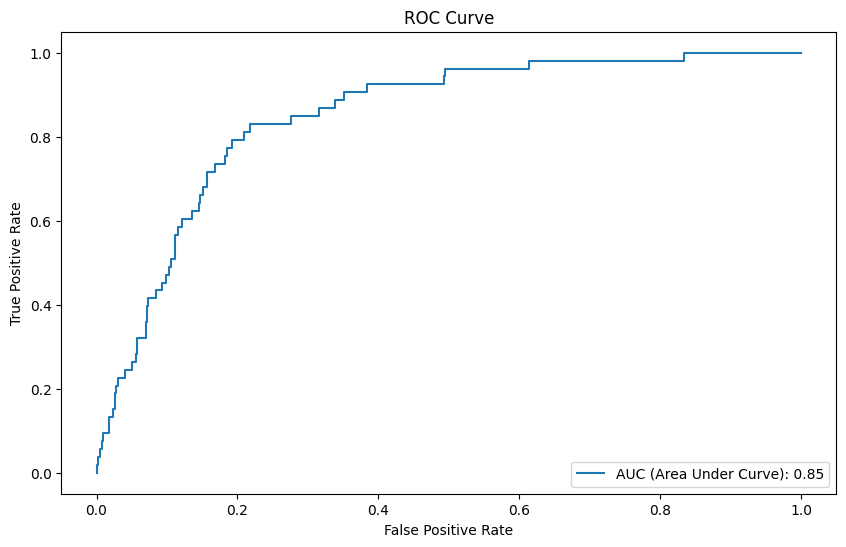

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Predicting the probabilities of our predictions
y_probs = lda.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC (Area Under Curve): {roc_auc_score(y_test, y_probs):.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

2. Precision-Recall Curve:

Precision-Recall is a useful measure to evaluate classifier output quality when classes are imbalanced. A high area under the curve represents both high recall and high precision.

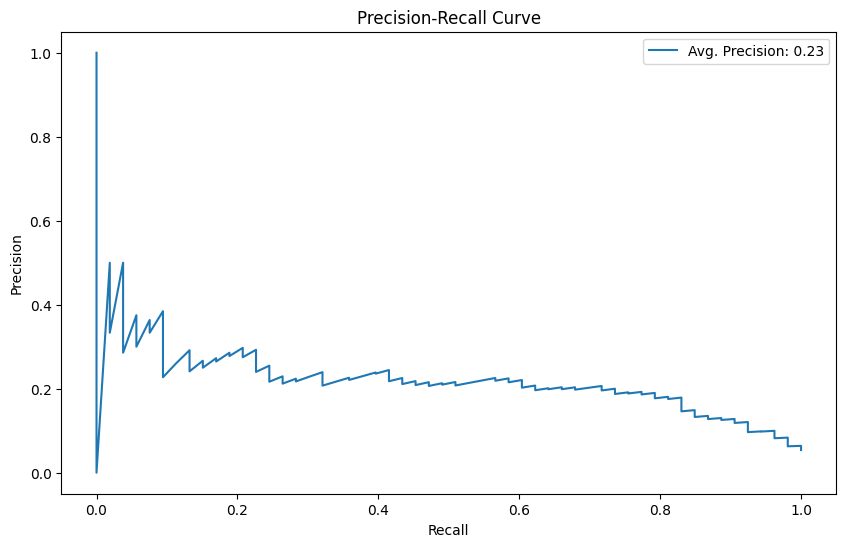

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Avg. Precision: {avg_precision:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.show()

3. Log Loss:

Log Loss quantifies the performance by penalizing false classifications. For binary classification, the number should be between 0 and 1. Lower is better.

In [ ]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, y_probs)
print(f'Log Loss: {loss:.2f}')


Log Loss: 0.17


Explanation:

ROC Curve and AUC: The ROC curve provides a graph of the trade-off between the true positive rate and false positive rate across different thresholds. The AUC summarizes the curve's performance into a single value between 0 (worst) and 1 (best). A classifier with AUC closer to 1 has a better distinction between positive and negative classes.

Precision-Recall Curve: This curve shows the relationship between precision and recall for every possible threshold. A high area under the curve is desirable, indicating high precision and recall for the classifier.

Log Loss: This measures the performance of a classification model where the prediction is a probability value between 0 and 1. It gives more nuanced insight into the model's performance, especially for models that output probabilities.

By incorporating these additional metrics, you'll have a richer understanding of your model's performance, especially when dealing with imbalanced datasets or when precision and recall are crucial.